In [1]:
import tensorflow as tf

(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.cifar100.load_data(label_mode='coarse')

In [2]:
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1]*train_data.shape[2]*train_data.shape[3])
test_data = test_data.reshape(test_data.shape[0], test_data.shape[1]*test_data.shape[2]*test_data.shape[3])

In [3]:
import numpy as np

means = np.mean(train_data, axis = 0)
stds = np.std(train_data, axis = 0)
train_data = train_data - means
train_data = train_data/stds

test_data = test_data - np.mean(train_data, axis = 0)
test_data = test_data/np.std(train_data, axis = 0)

In [4]:
train_labels = train_labels.reshape(train_labels.shape[0])
test_labels = test_labels.reshape(test_labels.shape[0])

In [5]:
from scipy import linalg
U, S, VT = linalg.svd(train_data, full_matrices = False)

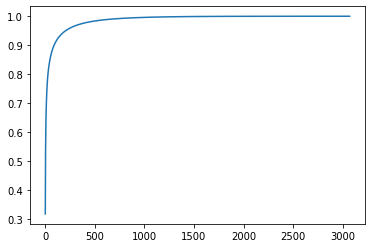

In [6]:
import matplotlib.pyplot as plt

explained_variance = pow(S,2)/(S.shape[0] - 1)
total_variance = np.sum(explained_variance)
explained_variance_ratio = explained_variance/total_variance

plt.plot(np.cumsum(explained_variance_ratio))

In [7]:
n = np.where(np.cumsum(explained_variance_ratio) > 0.8)[0][0]

n = 27
S = np.diag(S)
train_data = np.dot(U[0:50000,0:n], S[0:n, 0:n])
train_data.shape

(50000, 27)

In [8]:
test_data = test_data.reshape((test_data.shape[0], 32*32*3))

test_data = test_data - means
test_data = test_data/stds

test_data = np.dot(test_data, VT[0:n,0:32*32*3].T)    
test_data.shape

(10000, 27)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

for n in [5,10,15,20,25,30]:
    
    model = RandomForestClassifier(max_depth=n, random_state=0)
    accs = cross_val_score(model, train_data, train_labels, cv=10)
    acc = np.mean(accs)
    
    model.fit(train_data, train_labels)
    predictions = model.predict(test_data)
    correct = np.where(predictions == test_labels,1,0)
    print('Depth = ' ,n, ' CV_Accuracy = ', acc,' Test Accuracy = ', np.sum(correct)/len(test_labels))

Depth =  5  CV_Accuracy =  0.22931999999999997  Test Accuracy =  0.2236
Depth =  10  CV_Accuracy =  0.28840000000000005  Test Accuracy =  0.2869
Depth =  15  CV_Accuracy =  0.32330000000000003  Test Accuracy =  0.3215
Depth =  20  CV_Accuracy =  0.3338  Test Accuracy =  0.3274
Depth =  25  CV_Accuracy =  0.33662  Test Accuracy =  0.3396
Depth =  30  CV_Accuracy =  0.33774  Test Accuracy =  0.3387


In [12]:
from sklearn import metrics

Depth = 25 #best hyperparameter

model = RandomForestClassifier(max_depth=n, random_state=0)
model.fit(train_data, train_labels)
predictions = model.predict(test_data)
correct = np.where(predictions == test_labels,1,0)
print('k = ' ,n, ' CV_Accuracy = ', acc,' Test Accuracy = ', np.sum(correct)/len(test_labels))


print(metrics.classification_report(test_labels, predictions))

k =  30  CV_Accuracy =  0.33774  Test Accuracy =  0.3387
              precision    recall  f1-score   support

           0       0.34      0.34      0.34       500
           1       0.38      0.36      0.37       500
           2       0.43      0.59      0.49       500
           3       0.39      0.33      0.36       500
           4       0.41      0.44      0.43       500
           5       0.33      0.28      0.30       500
           6       0.33      0.32      0.33       500
           7       0.34      0.40      0.37       500
           8       0.21      0.24      0.22       500
           9       0.38      0.50      0.43       500
          10       0.49      0.53      0.51       500
          11       0.27      0.25      0.26       500
          12       0.22      0.26      0.24       500
          13       0.25      0.17      0.20       500
          14       0.33      0.34      0.33       500
          15       0.19      0.14      0.16       500
          16       0.21 

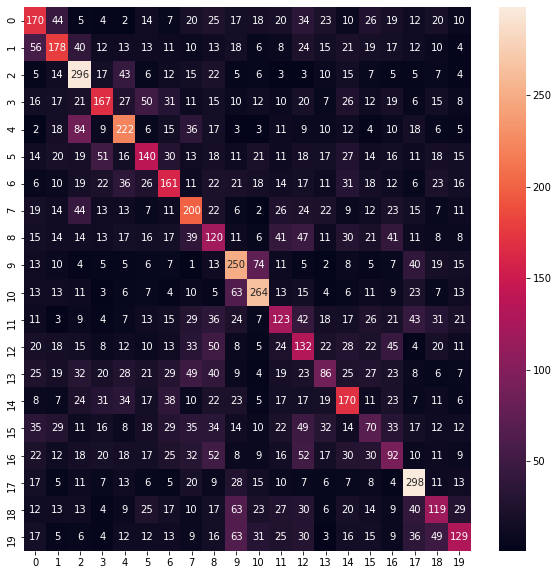

In [14]:
import seaborn as sns

cm = metrics.confusion_matrix(test_labels, predictions)
plt.figure(figsize = (10,10))
sns.heatmap(cm,annot=True,fmt='g')
plt.show()